## Section 1: Business Understanding 

#### Question 1: How many places are availble in each month? Is there any pattern to this (chart)?
#### Question 2: What is the total amount of earning potential remaining for each listing?
#### Question 3: Is there any corelation between the number of available listings and their price?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

## Section 2: Data Understanding

### Gather Data

##### I loaded the data from the csv file into a data frame in order to put it into a format which is easy to analyse and interrogate.

In [4]:
# load calendar data for Seattle Air BnB
df = pd.read_csv('./calendar.csv')
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Assess the Data

In [5]:
#check for null values and provide columns with no missing values
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.

no_nulls

{'available', 'date', 'listing_id'}

#### This process helped to establish which columns contained null values in order to consider these in the context of the data. It was then clear that price is null when the listing is not available. In future steps I will set these to 0 so that the formatting is consistent in the price column.

In [6]:
# Explore the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Section 3: Data Preparation

### Clean the Data

#### I took the decision to set the null values in the price column to 0 as mentioned above. This made it easier to evaluate the relationship between variables within the data set

In [7]:
#the only columns with missing values, makes sense to convert these to $0
df['price'].fillna('$0', inplace=True)

In [8]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,$0
3,241032,2016-01-07,f,$0
4,241032,2016-01-08,f,$0


#### Removing the dollar symbol to make it easier to analyse the data.

In [9]:
#remove symbols for ease of analysis
df['price'] = df['price'].apply(lambda x:''.join(x.split(',')))
df['price'] = df['price'].apply(lambda x:float(x.split('$')[1]))
df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,0.0
1393566,10208623,2016-12-30,f,0.0
1393567,10208623,2016-12-31,f,0.0
1393568,10208623,2017-01-01,f,0.0


#### Classifying the availability column to check for patterns in the data. By re-coding the values, it is easier to run analyses with more meaningful values.

In [10]:
# re-code availability column to allow for easier analysis 1 for available 0 for not available
df['available'] = df['available'].replace(['t'],1)
df['available'] = df['available'].replace(['f'],0)

#extract value for month and set values to new column to analyse month values only
df['month'] = df['date'].apply(lambda x: x.split('-')[1])

In [35]:
df

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,01
1,241032,2016-01-05,1,85.0,01
2,241032,2016-01-06,0,0.0,01
3,241032,2016-01-07,0,0.0,01
4,241032,2016-01-08,0,0.0,01
...,...,...,...,...,...
1393565,10208623,2016-12-29,0,0.0,12
1393566,10208623,2016-12-30,0,0.0,12
1393567,10208623,2016-12-31,0,0.0,12
1393568,10208623,2017-01-01,0,0.0,01


## Section 4: Evaluate the Results

### Analyse the Data

#### Question 1. How many places are availble in each month? Is there any pattern to this (chart)?

#### this section of the analysis sums the total price per month, this is aided by the fact that I extract the month value in previous steps.

In [11]:
avail_per_month = df.groupby(['month']).sum()
avail_per_month.reset_index(inplace=True)
avail_per_month

,month,listing_id,available,price
0,01,635709761880,64937,7981548.0
1,02,614519436484,73321,9113355.0
2,03,656900087276,83938,10798161.0
3,04,635709761880,76037,10272371.0
4,05,656900087276,79971,11159008.0
5,06,635709761880,77244,11391415.0
6,07,656900087276,74222,11288732.0
7,08,656900087276,76347,11502179.0
8,09,635709761880,77246,11065949.0
9,10,656900087276,82438,11296639.0


#### Chart showing how many places are available in each month.

#### Using the re-classifaction step above, I was able to take the value of available properties per month and plot them over the course of the 12 month period. This allows me to produce a visual representation of the data and to look for any fluctuations. This allows me to make interpretations about the number of available properties and the time of year (potentially make inferences) and suggestions for which months where marketing maybe needs to be more of a focus.

### Visualise Q1

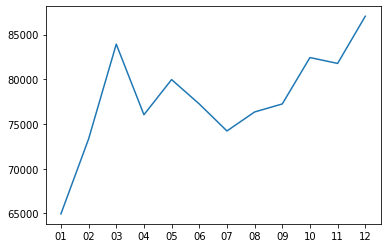

In [12]:
plt.plot(avail_per_month['month'], avail_per_month['available'])

#### Looking at the chart, it appears that there is greater availability in spring and just before the new year. Whereas in the period just after new year, in January, there is less availability. There is less availability in the summer but not as little as in the prior mentioned periods.

#### Question 2. What is the total amount of earning potential remaining for each listing? 

#### This analysis aimed to check the remaining earning potential for each listing based on the number of properties still available to book.

In [18]:
def cost_id(column_name):
    '''
    This function calculates the total price per listing id
    
    Input: column name
    
    Output:
    df containing total price for each listing id
    
    '''
    cost_per_id = df.groupby(column_name).sum()
    cost_per_id.reset_index(inplace=True)
    print(cost_per_id)
    
cost_id(df['listing_id'])

      listing_id  available    price
0           3335        309  37080.0
1           4291        365  29930.0
2           5682        309  16669.0
3           6606        365  33890.0
4           7369         53   4505.0
...          ...        ...      ...
3813    10332096        365  14600.0
3814    10334184        361  43320.0
3815    10339144          0      0.0
3816    10339145        365  86835.0
3817    10340165        358  15394.0

[3818 rows x 3 columns]


### Visualise Q2

#### I then wanted to visualise this information to show the potential earnings across the properites. This allows for a quick way to see differences between properties, but detailed information is best provided by looking at the table.

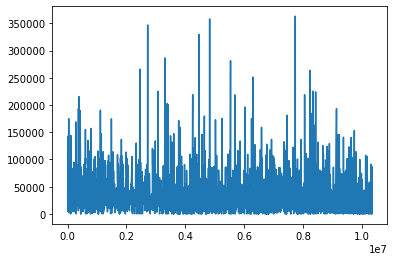

In [43]:
plt.plot(cost_per_id['listing_id'], cost_per_id['price'])

#### The chart shows that there is variability in the potential earnings across listings. The average potential is around 7500-10000with the max showing at around 35000, and the minimum 5000.

### Question 3. Is there any corelation between the number of available listings and their price?

#### In this section I wanted to check if there was any relationship between the number of available properties and their overall cost. This analysis is slightly crude in that in only looks at the total price for the total number of properties available. But gives a brief insight into whether there is any relationship between these variables.

In [48]:
# correlation between Col1 and Col2
avail_per_month['month'] = avail_per_month['month'].map(int)
avail_per_month['month'].corr(avail_per_month['price'])

0.7818662298704191

#### There is a significant, positive correlation between the number of available properties per month and their price (0.78). This may suggest that where properties are more expensive, they are more likely to be available.